# Data Loading

In [14]:
## Import necessary packages ##
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
## Import the data ##
df = pd.read_csv("../Final Project/Datasets/encounters-by-facility_2012-2023_20240702.csv")
df

,year,oshpd_id,facility_name,county_name,er_service_level_desc,type,count
0,2012,106010735,ALAMEDA HOSPITAL,ALAMEDA,BASIC,ED_Admit,2595.0
1,2012,106010735,ALAMEDA HOSPITAL,ALAMEDA,BASIC,ED_Visit,13727.0
2,2013,106010735,ALAMEDA HOSPITAL,ALAMEDA,BASIC,ED_Admit,2579.0
3,2013,106010735,ALAMEDA HOSPITAL,ALAMEDA,BASIC,ED_Visit,13538.0
4,2014,106010735,ALAMEDA HOSPITAL,ALAMEDA,BASIC,ED_Admit,2214.0
...,...,...,...,...,...,...,...
7841,2021,106580996,ADVENTIST HEALTH AND RIDEOUT,YUBA,BASIC,ED_Visit,55341.0
7842,2022,106580996,ADVENTIST HEALTH AND RIDEOUT,YUBA,BASIC,ED_Admit,7840.0
7843,2022,106580996,ADVENTIST HEALTH AND RIDEOUT,YUBA,BASIC,ED_Visit,63625.0
7844,2023,106580996,ADVENTIST HEALTH AND RIDEOUT,YUBA,BASIC,ED_Visit,60131.0


In [8]:
## Display the first few rows & basic information ##
print(df.head())
print(df.info())

   year   oshpd_id     facility_name county_name er_service_level_desc  \
0  2012  106010735  ALAMEDA HOSPITAL     ALAMEDA                 BASIC   
1  2012  106010735  ALAMEDA HOSPITAL     ALAMEDA                 BASIC   
2  2013  106010735  ALAMEDA HOSPITAL     ALAMEDA                 BASIC   
3  2013  106010735  ALAMEDA HOSPITAL     ALAMEDA                 BASIC   
4  2014  106010735  ALAMEDA HOSPITAL     ALAMEDA                 BASIC   

       type    count  
0  ED_Admit   2595.0  
1  ED_Visit  13727.0  
2  ED_Admit   2579.0  
3  ED_Visit  13538.0  
4  ED_Admit   2214.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7846 entries, 0 to 7845
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   7846 non-null   int64  
 1   oshpd_id               7846 non-null   int64  
 2   facility_name          7846 non-null   object 
 3   county_name            7846 non-null   object 

In [10]:
## Check for missing values ##
print(df.isnull().sum())

year                       0
oshpd_id                   0
facility_name              0
county_name                0
er_service_level_desc    166
type                       0
count                     98
dtype: int64


# Data Preprocessing 

In [16]:
## Convert 'year' to datetime ##
df['year'] = pd.to_datetime(df['year'], format='%Y')

In [18]:
## Convert 'count' to numeric, replacing any non-numeric values with NaN ##
df['count'] = pd.to_numeric(df['count'], errors='coerce')

In [20]:
## Create a new column 'visit_type' based on 'type' column ##
df['visit_type'] = df['type'].map({'ED_Admit': 'Admission', 'ED_Visit': 'Visit'})

In [22]:
## Group by year, facility, and visit type. Get the total sum count ##
df_grouped = df.groupby(['year', 'facility_name', 'visit_type'])['count'].sum().unstack(level='visit_type').reset_index()

In [26]:
## Calculate the total number of visits & admission rate ##
df_grouped['Total_Visits'] = df_grouped['Admission'].fillna(0) + df_grouped['Visit'].fillna(0)
df_grouped['Admission_Rate'] = df_grouped['Admission'] / df_grouped['Total_Visits']

In [28]:
## Sort the dataframe by year and total visits ##
df_grouped = df_grouped.sort_values(['year', "Total_Visits"], ascending=[True, False])

In [30]:
## Display the first few rows of the processed data ##
print(df_grouped.head())

visit_type       year                         facility_name  Admission  \
148        2012-01-01                LAC+USC MEDICAL CENTER    24362.0   
119        2012-01-01  KAISER FOUNDATION HOSPITAL - FONTANA    13039.0   
22         2012-01-01     ARROWHEAD REGIONAL MEDICAL CENTER    20362.0   
257        2012-01-01                SCRIPPS MERCY HOSPITAL    21138.0   
21         2012-01-01              ANTELOPE VALLEY HOSPITAL    13234.0   

visit_type     Visit  Total_Visits  Admission_Rate  
148         120359.0      144721.0        0.168338  
119         110985.0      124024.0        0.105133  
22           95717.0      116079.0        0.175415  
257          84655.0      105793.0        0.199805  
21           91791.0      105025.0        0.126008  


# Basic visualizations

Gives an overall view of the data after preprocessing the dataset. Here I use the boxplot to show the distribution of Admission Rate along with the summary statisitcs of Admission Rate and Total Visits group by the year. 

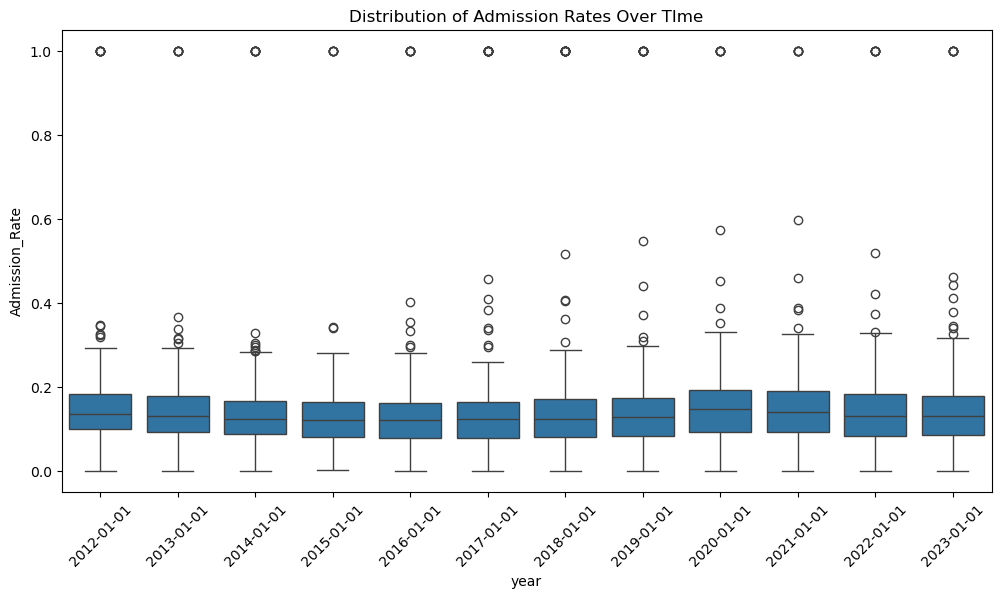

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_grouped, x='year', y='Admission_Rate')
plt.title('Distribution of Admission Rates Over TIme')
plt.xticks(rotation=45)
plt.show()

In [37]:
## Summary statistics ##
print(df_grouped.groupby('year')[['Total_Visits', 'Admission_Rate']].describe())

visit_type Total_Visits                                                      \
                  count          mean           std  min       25%      50%   
year                                                                          
2012-01-01        331.0  37482.909366  25734.138450  1.0  16701.00  33061.0   
2013-01-01        331.0  38422.731118  26802.923023  1.0  17138.50  34310.0   
2014-01-01        332.0  40300.560241  27531.367832  1.0  18040.50  36883.5   
2015-01-01        328.0  43454.542683  29251.999209  1.0  20044.25  39147.0   
2016-01-01        326.0  44625.837423  30060.712194  1.0  20718.00  39931.0   
2017-01-01        331.0  44785.776435  31320.341601  1.0  19797.00  39730.0   
2018-01-01        333.0  43919.738739  31548.066471  1.0  18992.00  38562.0   
2019-01-01        326.0  45563.751534  32210.586890  1.0  19674.00  40094.5   
2020-01-01        320.0  37111.606250  25995.507695  1.0  16635.25  32219.0   
2021-01-01        322.0  39968.618012  28477.518134 